In this notebook we simulate future stcok prices from 31 october 2014 to 31 jctober 2023. We assume that the voatility follows stockastic process (Heston Model)

# 0. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generation of stock prices

**Step 1.**\
Assume that the stock price follows GBM process of Heston model:

$
\quad dS_t =\mu S_t d_t + \sqrt{V_t} S_t dW_t^S
$

where 

$
\quad dV_t = \alpha (\bar{V} - V_t) dt + \sigma_V \sqrt{V_t} dz_t^V
$

where $\alpha = 5.07$%, $\sqrt{\bar{V}} = 21.38$%, $\sigma_V = 48$%

$
V_t = (\sigma_t)^2
$

**Step 2.**\
Assume equity Sharpe ratio is constant at a level $\lambda_0 = \bar{\lambda_0} = 40$%

**Step 3.**\
From steps 1, 2, and definition of the sharpe ratio get:\
$dS_t = (r + \lambda_t \sigma_t) S_t dt + \sigma_t S_t dW_t^S$

Hence, the generation of the process should look like:

$
\begin{cases}
S_{t+dt} = S_t \times \exp \left( \left( r + \bar{\lambda_0} \sigma_t - \frac{1}{2} \sigma_t^2 \right) dt + \sigma_t \sqrt{dt} Z_t^S \right) \\
V_{t+dt} = V_t + \alpha (\bar{V} - V_t) dt + \sigma_V \sqrt{V_t} \sqrt{dt} Z_t^V
\end{cases}
$

I use the code from: [initial code source](https://github.com/Pauli-Isosomppi/Heston-model/blob/main/Heston%20model.ipynb)

Problem encountered: volatility goest to 0. Full truncation does not help. https://www.quantstart.com/articles/Heston-Stochastic-Volatility-Model-with-Euler-Discretisation-in-C/

In [139]:
def heston_model_sim(S0,
                     v0,
                     T,
                     N,
                     M,
                     r,
                     lt_lambda = 0.4,
                     rho = -0.767, # are you sure, Sasha? Is not it zero based on the slides of the lecture?
                     alpha = 0.0507,
                     lt_variance = 0.2138**2,
                     sigma_of_variance = 0.48
                     ):
    """
    Inputs:
     - S0, v0: initial parameters for asset and variance
     - T     : time of simulation (years of simulation)
     - N     : number of time steps (252 stands for days)
     - M     : number of scenarios / simulations
     - r     : risk-free rate
     - rho   : correlation between asset returns and variance
     - lt_lambda: long-term mean of Sharpe Ratio
     - alpha : rate of mean reversion in variance process
     - lt_variance : long-term mean of variance process
     - sigma_of_variance : vol of vol / volatility of variance process
    
    Outputs:
    - asset prices over time (numpy array)
    - variance over time (numpy array)
    """
    # initialise other parameters
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])

    # arrays for storing prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)
    # sampling correlated brownian motions under risk-neutral measure
    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r + lt_lambda * np.sqrt(v[i-1]) - 0.5*v[i-1])*dt + np.sqrt(v[i-1] * dt) * Z[i-1,:,0] )
        v[i] = np.maximum(v[i-1] + alpha * (lt_variance - v[i-1]) * dt + sigma_of_variance * np.sqrt(v[i-1]) * np.sqrt(dt) * Z[i-1,:,1],1e-6)


    return S, v

In [140]:
# Parameters
# simulation dependent
S0 = 100.0             # asset price
T = 10.0                # time in years
r = 0.02               # risk-free rate
N = 252                # number of time steps in simulation
M = 10                 # number of simulations
v0 = 0.2138**2         # initial variance under risk-neutral dynamics

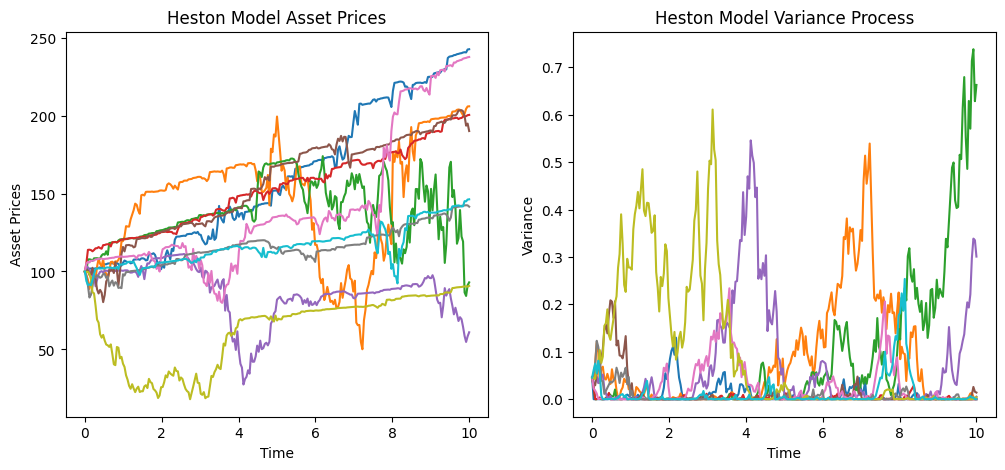

In [141]:
S_p,v_p = heston_model_sim(S0,v0,T, N,M,r)
S_n,v_n = heston_model_sim(S0,v0,T, N,M,r)

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time,S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')

ax2.plot(time,v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

plt.show()

In [172]:
# values taht would work. but they are unrealistic
2*0.150*(0.26**2)-(0.14**2)

0.00068

In [149]:
2*0.0507*(0.2138**2)

0.004635038616

In [147]:
0.48**2

0.2304

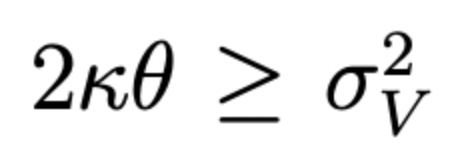

Fitted values were bad

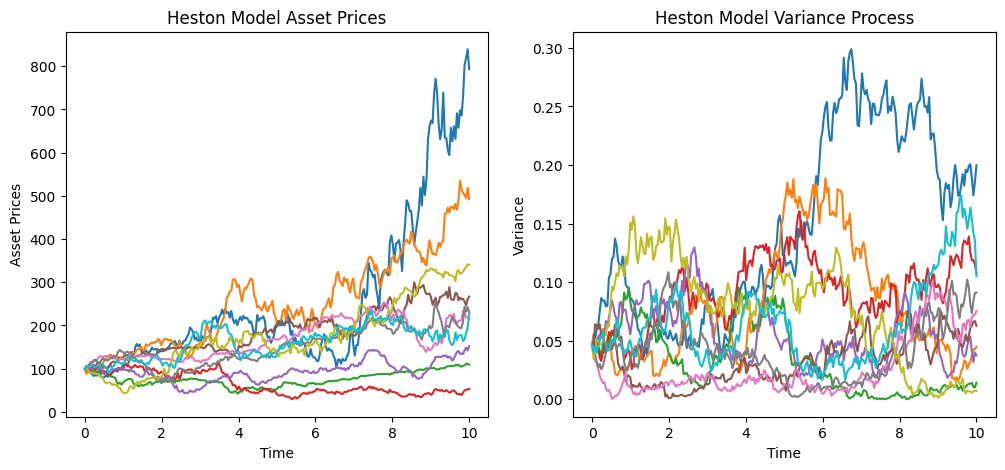

In [173]:
S_p,v_p = heston_model_sim(S0,v0,T, N,M,r,alpha = 0.15, lt_variance = 0.26**2, sigma_of_variance = 0.14)
S_n,v_n = heston_model_sim(S0,v0,T, N,M,r)

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time,S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')

ax2.plot(time,v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

plt.show()